## Binomial Distribution

### Problem Statement

80% of all the visitors to Lavista Museum end up buying souvenirs from the souvenir shop at the Museum. On the coming Sunday, if a random sample of 10 visitors is picked:

1. Find the probability that every visitor will end up buying from the souvenir shop

2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n,p = 10,0.8

In [3]:
k = np.arange(11)
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
from scipy.stats import binom
binomial = binom.pmf(k=k, n=n, p=p)

In [5]:
binomial

array([1.02400000e-07, 4.09600000e-06, 7.37280000e-05, 7.86432000e-04,
       5.50502400e-03, 2.64241152e-02, 8.80803840e-02, 2.01326592e-01,
       3.01989888e-01, 2.68435456e-01, 1.07374182e-01])

Text(0, 0.5, 'Probability of Successes')

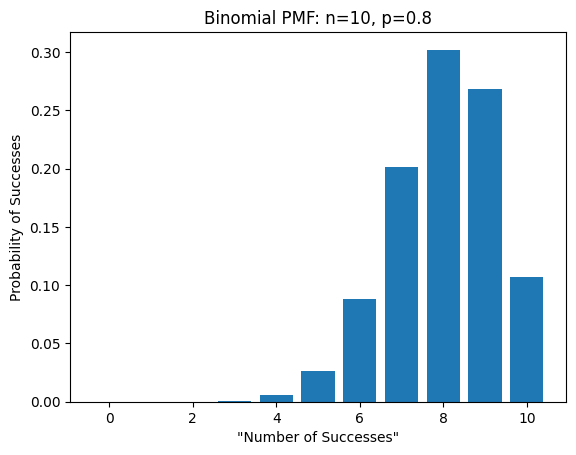

In [6]:
plt.bar(x=k, height=binomial)

plt.title('Binomial PMF: n=10, p=0.8')
plt.xlabel('"Number of Successes"')
plt.ylabel("Probability of Successes")

The last element of 'binomial' would be the probability that all 10 visitors would be a souvenir

In [7]:
binomial[10]

0.10737418240000011

Probability that max 7 visitors would buy souvenir would be addition of probabilities till random variable 7

In [8]:
np.sum(binomial[:8])

0.3222004735999996

Cumulative Density Function of a Random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

In our case it is P(X <= 7)

In [9]:
# Another way is using 'binom.cdf()'
binom.cdf(k=7, n=n, p=p)

0.3222004735999997

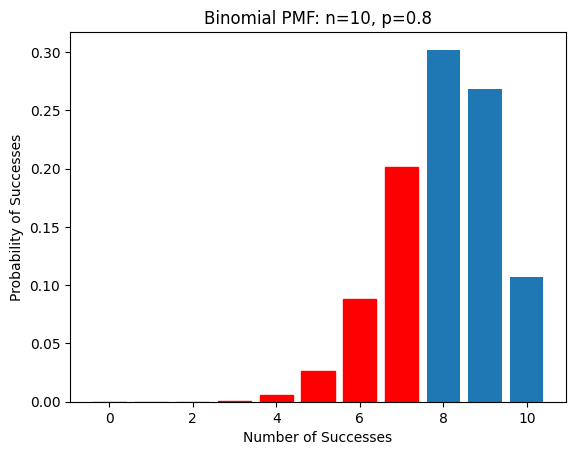

In [10]:
# Representing with chart
a = plt.bar(k,binomial)
plt.title('Binomial PMF: n=10, p=0.8')
plt.xlabel('Number of Successes')
plt.ylabel("Probability of Successes")

for i in range(8):
    a[i].set_color('r')

plt.show()

Let's plot PMF for Probability of Successes 70%, 80% and 90%. Sample Size n = 10 

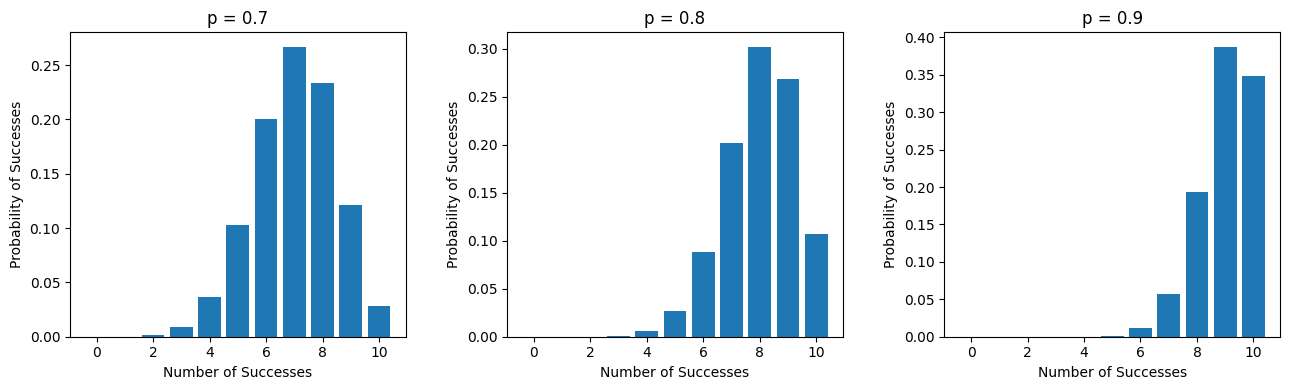

In [11]:
fig,ax = plt.subplots(1,3,figsize=(13,4))
for i in range(3):
    ax[i].bar(k, binom.pmf(k=k, n=n, p=round(i/10+0.7,1)))
    ax[i].set_title(f"p = {round(0.7+i/10,1)}")
    ax[i].set_xlabel('Number of Successes')
    ax[i].set_ylabel("Probability of Successes")

plt.tight_layout(w_pad=3)
plt.show()

It is clear from the above plot that the shape of the distribution changes as the value of p (probability of success) changes.

------------------------------------------------------------------------------------------------------------------------------------------------------------

## Continuous Uniform Distribution

### Problem Statement

IT industry records the amount of time a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let X = Time needed to fix bugs

X is a continuous random variable. Let's see the distribution of X and answer the below questions.

1. Find the probability that a randomly selected software debugging requires less than three hours

2. Find the probability that a randomly selected software debugging requires more than two hours

3. Find the 50th percentile of the software debugging time

In [12]:
df = pd.read_csv("debugging.csv")
df.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


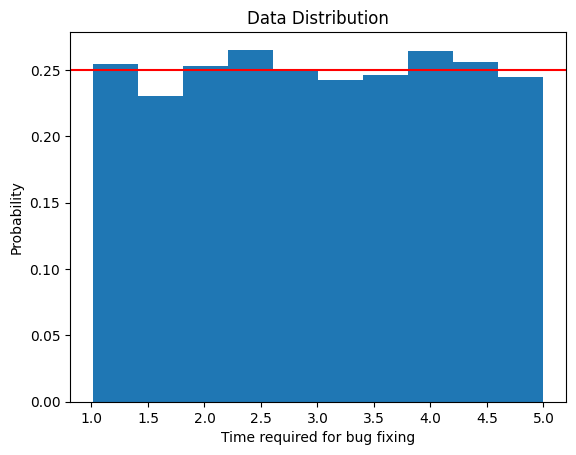

In [13]:
plt.hist(df["Time Taken to fix the bug"], density=True)
plt.axhline(1 / 4, color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

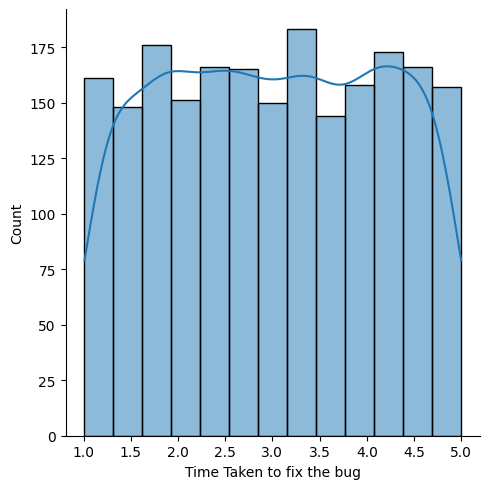

In [14]:
sns.displot(df["Time Taken to fix the bug"], kde=True)
plt.show()

Insight: As you can see from the above plot that all the values between 1 and 5 are having almost equal probability, we are going to use continuous uniform distribution. We need to decide the endpoints. Here, endpoints are 1 and 5.

X ~ U(1, 5)

In [15]:
from scipy.stats import uniform
X = np.linspace(1,5,50)
prob = uniform.pdf(X, loc=1, scale=4)

In [16]:
prob

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25, 0.25])

Calculating CDF P(X <= 3)

In [17]:
uniform.cdf(x=3, loc=1, scale=4)

0.5

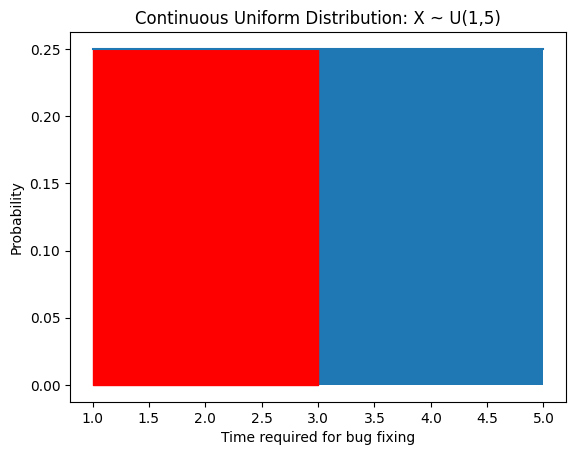

In [18]:
# Visualizing the above
x1 = np.linspace(1,3,50)
plt.plot(X, prob)
plt.fill_between(X, prob)
plt.fill_between(x1, uniform.pdf(x1, loc=1, scale=4), color='r')

plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

Calculating P(X > 2) = 1 - P(X <= 2)

In [19]:
1 - uniform.cdf(x=2, loc=1, scale=4)

0.75

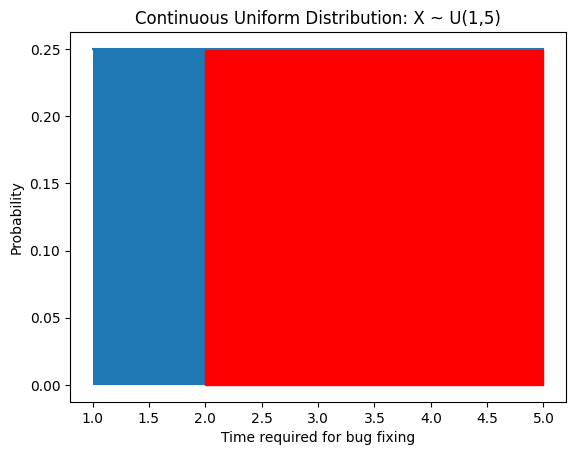

In [20]:
# Visualizing the above
x1 = np.linspace(2,5,50)
plt.plot(X, prob)
plt.fill_between(X, prob)
plt.fill_between(x1, uniform.pdf(x1, loc=1, scale=4), color='r')

plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

Let's calculate the 50th percentile of software debugging time.

ppf(): It is used to calculate the percentile point given probability. It works opposite of cdf()

In [21]:
uniform.ppf(q=0.5, loc=1, scale=4)

3.0

## Normal Distribution

### Problem statement

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.

In [22]:
df = pd.read_csv("sat_score.csv")
df.head() 

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [23]:
df.shape

(1000, 2)

In [24]:
mu = round(df['score'].mean(),2)
sigma = round(df['score'].std(),2)

In [25]:
from scipy.stats import norm
X = np.linspace(df['score'].min(), df['score'].max(), 1000)
a = norm.pdf(X, mu, sigma)

In [26]:
a

array([3.98862515e-06, 4.08059007e-06, 4.17449995e-06, 4.27039157e-06,
       4.36830229e-06, 4.46827009e-06, 4.57033354e-06, 4.67453183e-06,
       4.78090477e-06, 4.88949282e-06, 5.00033704e-06, 5.11347917e-06,
       5.22896157e-06, 5.34682730e-06, 5.46712004e-06, 5.58988417e-06,
       5.71516477e-06, 5.84300757e-06, 5.97345902e-06, 6.10656628e-06,
       6.24237721e-06, 6.38094041e-06, 6.52230518e-06, 6.66652158e-06,
       6.81364041e-06, 6.96371321e-06, 7.11679230e-06, 7.27293074e-06,
       7.43218240e-06, 7.59460190e-06, 7.76024468e-06, 7.92916695e-06,
       8.10142576e-06, 8.27707896e-06, 8.45618520e-06, 8.63880400e-06,
       8.82499570e-06, 9.01482148e-06, 9.20834338e-06, 9.40562431e-06,
       9.60672804e-06, 9.81171922e-06, 1.00206634e-05, 1.02336270e-05,
       1.04506773e-05, 1.06718826e-05, 1.08973121e-05, 1.11270358e-05,
       1.13611247e-05, 1.15996509e-05, 1.18426871e-05, 1.20903072e-05,
       1.23425861e-05, 1.25995995e-05, 1.28614243e-05, 1.31281381e-05,
      

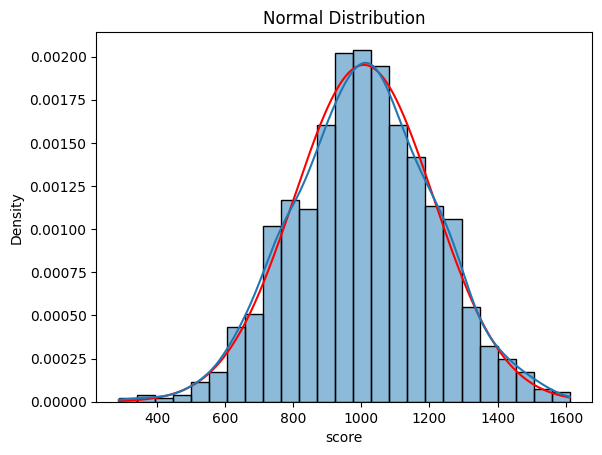

In [27]:
plt.plot(X, a, color='r')
sns.histplot(df['score'], stat='density', kde=True)
plt.title("Normal Distribution")
plt.show()

Insight: As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

X ~ N(mu, sigma)

1. Calculate the probability that a student will score less than 800 in SAT exam

In [28]:
norm.cdf(800, mu, sigma)

0.15509541402841764

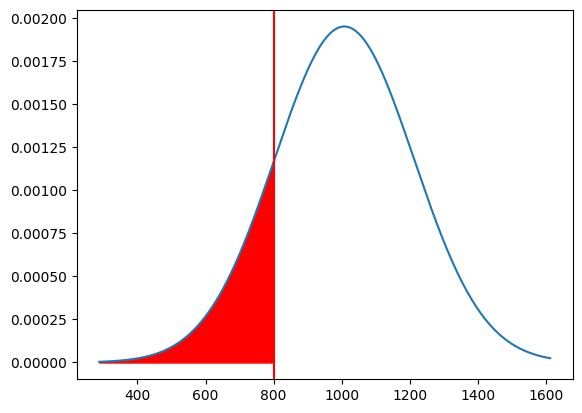

In [29]:
# Let's Visualize this
x1 = np.linspace(df['score'].min(), 800, 100)

plt.plot(X, a)
plt.axvline(x=800, color='r')
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color='r')
plt.show()

2. Calculate the probability that a student will score more than 1300 in SAT exam

In [30]:
1 - norm.cdf(1300, mu, sigma)

0.07621463791777128

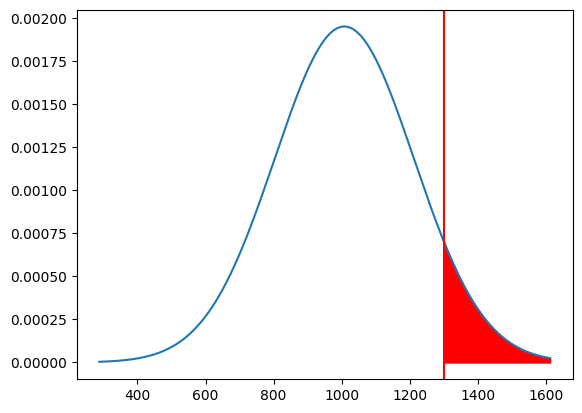

In [31]:
# Let's Visualize this
x2 = np.linspace(1300, df['score'].max(), 100)

plt.plot(X, a)
plt.axvline(x=1300, color='r')
plt.fill_between(x2, norm.pdf(x2, mu, sigma), color='r')
plt.show()

3. Calculate the minimum marks a student must score in order to secure 90th percentile

In [32]:
norm.ppf(0.9, mu, sigma)

1269.4475865442828

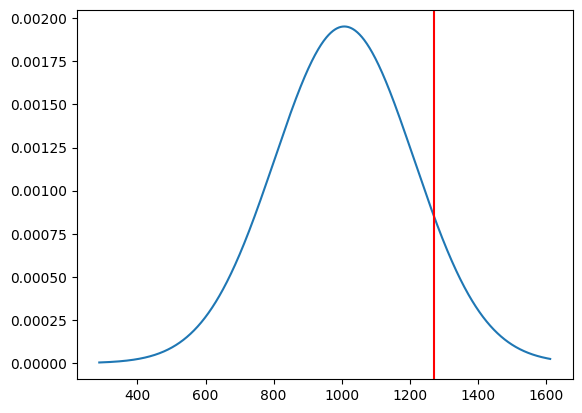

In [33]:
# Let's Visualize this
plt.plot(X, a)
plt.axvline(x=norm.ppf(0.9, mu, sigma), color='r')
plt.show()

4. Calculate the minimum marks a student must score in order to be in the top 5%

In [34]:
norm.ppf(0.95, mu, sigma)

1343.7174269576894

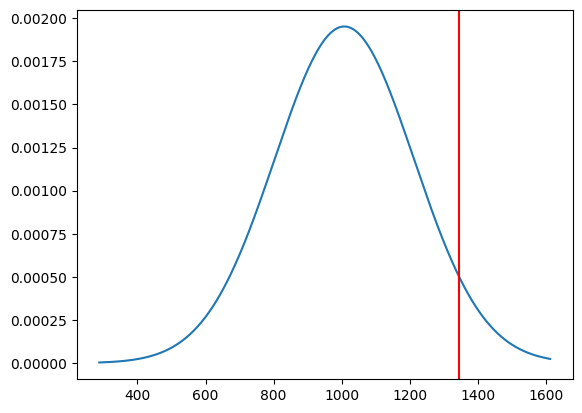

In [35]:
# Let's Visualize this
plt.plot(X, a)
plt.axvline(x=norm.ppf(0.95, mu, sigma), color='r')
plt.show()

## Standardization of Normal Variables

Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5.

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30.

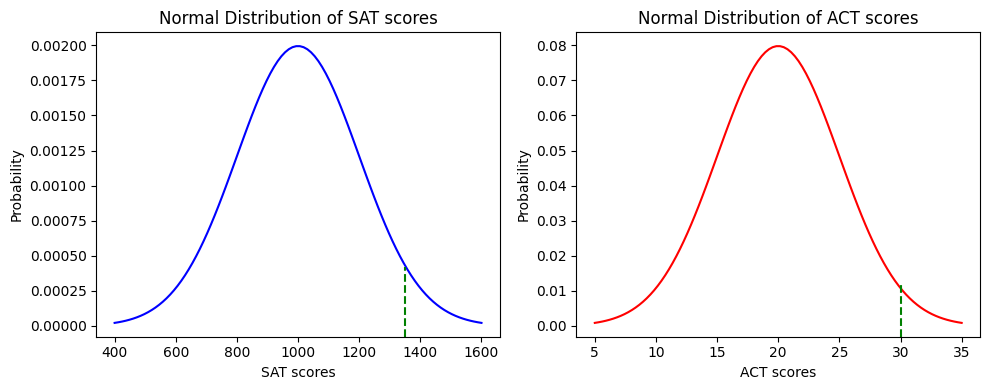

In [36]:
# Plotting the 2 normal distributions
fig,ax = plt.subplots(1,2,figsize=(10,4))
x1, x2 = np.linspace(400,1600,100), np.linspace(5,35,100)
ax[0].plot(x1, norm.pdf(x1, 1000, 200), color='b')
ax[0].set_title('Normal Distribution of SAT scores')
ax[0].set_xlabel('SAT scores')
ax[0].set_ylabel('Probability')
ax[0].axvline(1350, ymax = 0.23, linestyle = '--', color = 'green' )

ax[1].plot(x2, norm.pdf(x2, 20, 5), color='r')
ax[1].set_title('Normal Distribution of ACT scores')
ax[1].set_xlabel('ACT scores')
ax[1].set_ylabel('Probability')
ax[1].axvline(30, ymax = 0.17, linestyle = '--', color = 'green' )

plt.tight_layout()
plt.show()

Let's Standardize the two highest scores and compare their Z-scores.

In [37]:
top_sat = (1350 - 1000) / 200
print('The Z-score of highest scorer in SAT among all the applicants', top_sat)

top_act = (30 - 20) / 5
print('The Z-score of highest scorer in ACT among all the applicants', top_act)

The Z-score of highest scorer in SAT among all the applicants 1.75
The Z-score of highest scorer in ACT among all the applicants 2.0


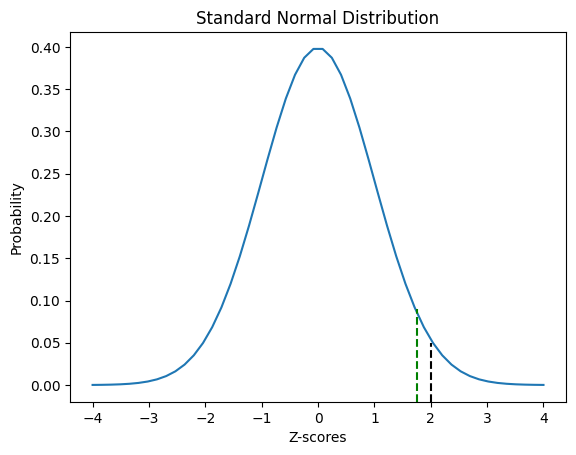

In [38]:
# Visualizing these 2 with Standard Normal Distribution
x = np.linspace(-4,4,50)
plt.plot(x, norm.pdf(x,0,1))
plt.title('Standard Normal Distribution')
plt.xlabel('Z-scores')
plt.ylabel('Probability')
plt.axvline(top_sat, ymax = 0.25, linestyle = '--', color = 'green')
plt.axvline(top_act, ymax = 0.16, linestyle = '--', color = 'black')
plt.show()

This means that among the applicants, the highest scorer in ACT (black line) performed better than the highest scorer in SAT (green line).

## Central Limit Theorem (CLT)

Central Limit Theorem states that if we independently draw multiple samples from a population, take the mean of each sample and plot these (sample means), then the plot will tend to normal distribution as the size of samples increases, regardless of the shape of the population distribution.

### Let's watch CLT in action using a python simulation

Creating a random Uniform Distribution

In [39]:
from scipy.stats import uniform
np.random.seed(1)
uniform_pop = uniform.rvs(0,10,size=100000)

We have created a population with values between 0 to 10. Total size is 100,000 and values are uniformly distributed. As seen in below Histogram, if we consider 10 bins of size 1, each bin has around 10,000 values, making total size 100,000.

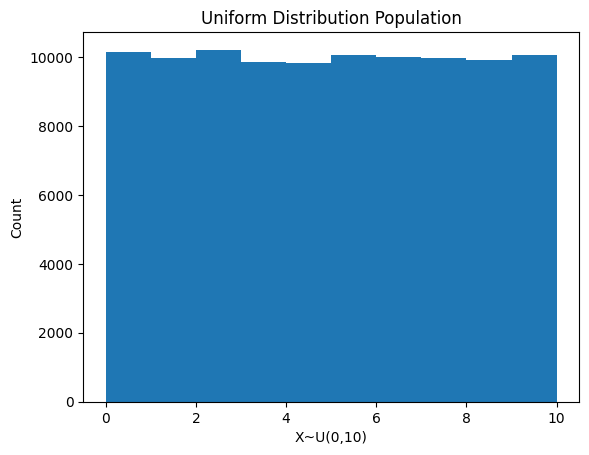

In [40]:
plt.hist(uniform_pop)
plt.title("Uniform Distribution Population")
plt.xlabel("X~U(0,10)")
plt.ylabel("Count")
plt.show()

Let's create a sampling distribution from this population (sample size=5, number of samples = 500)

draw a sample of size 5, so n=5, we draw 5 independent observations

get the mean of these 5 observations, i.e - sample mean

repeat the above 2 steps 500 times, so that we get 500 sample means, where n=5

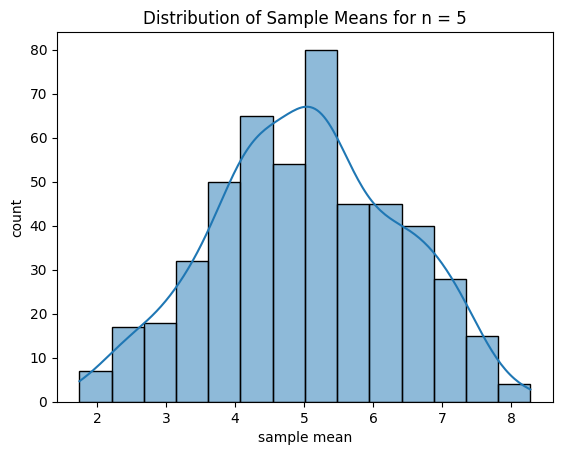

In [41]:
np.random.seed(1)
n = 5
sample_means = []
for i in range(500):
    sample = np.random.choice(uniform_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

Let's create another sampling distribution from this population, increase the sample size to 15 (n=15)

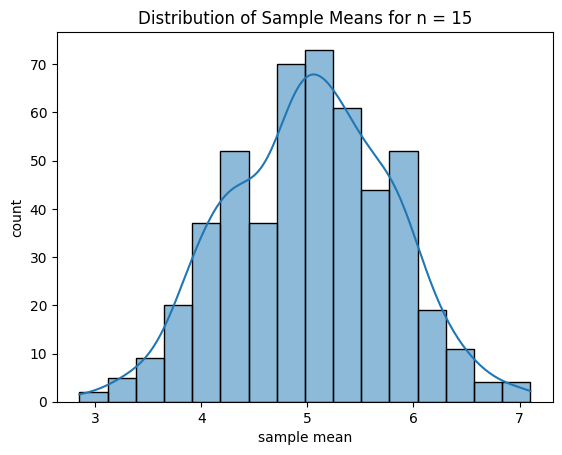

In [42]:
np.random.seed(1)
n = 15
sample_means = []
for i in range(500):
    sample = np.random.choice(uniform_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

Increase the sample size to 30 (n=30)

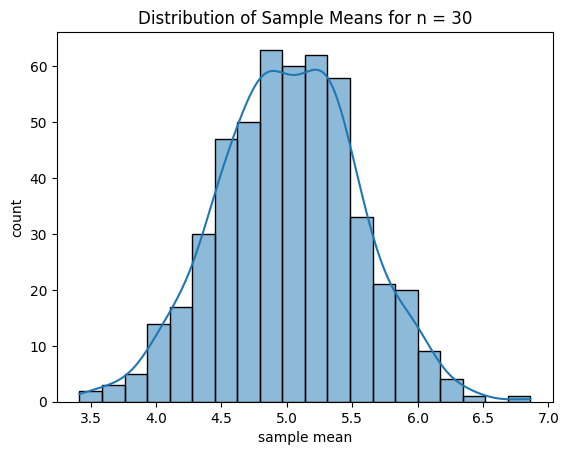

In [43]:
np.random.seed(1)
n = 30
sample_means = []
for i in range(500):
    sample = np.random.choice(uniform_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

Increase the sample size to 50 (n=50)

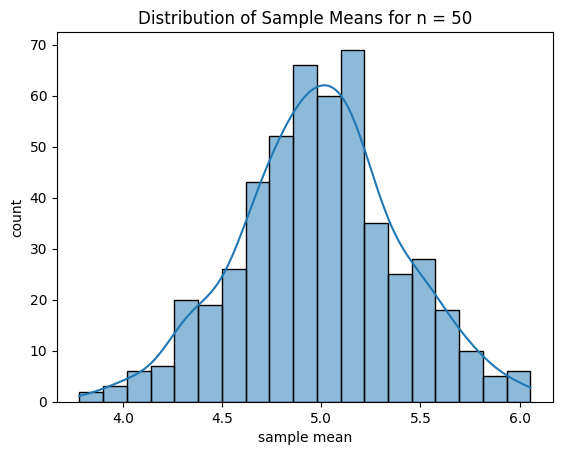

In [44]:
np.random.seed(1)
n = 50
sample_means = []
for i in range(500):
    sample = np.random.choice(uniform_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

Insight : Observe how the sampling distribution moves closer to normality as the sample size increases.

### Now lets validate CLT for a Random Normal Distribution

In [45]:
from scipy.stats import norm
np.random.seed(1)
normal_pop = norm.rvs(0, 1, size=100000)

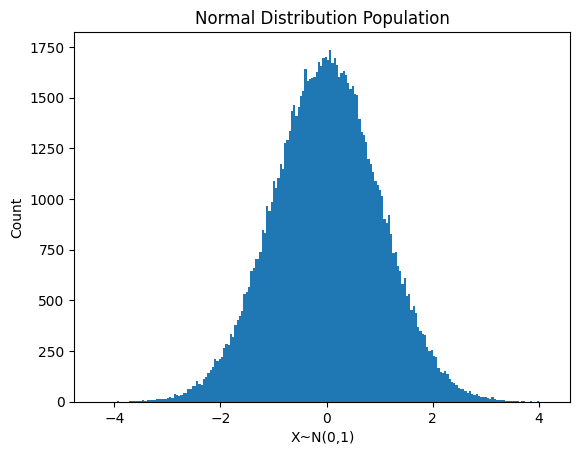

In [46]:
plt.hist(normal_pop, 200)
plt.title("Normal Distribution Population")
plt.xlabel("X~N(0,1)")
plt.ylabel("Count")
plt.show()

Let's do for sample size n = 5,15,30. 500 samples

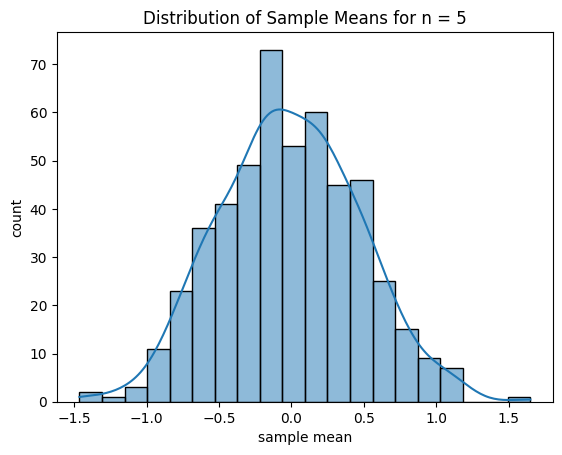

In [47]:
np.random.seed(1)
sample_means = []
n = 5
for i in range(500):
    sample = np.random.choice(normal_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

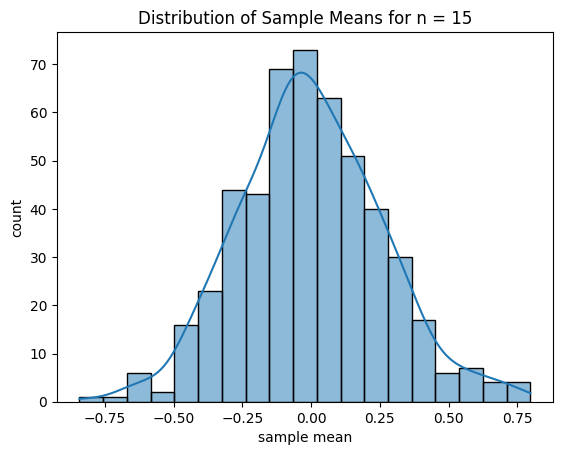

In [48]:
np.random.seed(1)
sample_means = []
n = 15
for i in range(500):
    sample = np.random.choice(normal_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

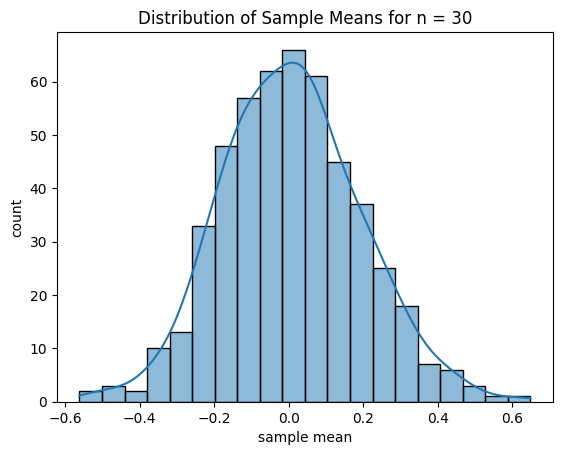

In [49]:
np.random.seed(1)
sample_means = []
n = 30
for i in range(500):
    sample = np.random.choice(normal_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

Insight : Observe how the sampling distribution moves closer to normality as the sample size increases. CLT satisfies

### Now lets validate CLT for a Exponential Distribution

In [50]:
from scipy.stats import expon
expon_pop = expon.rvs(size=100000)

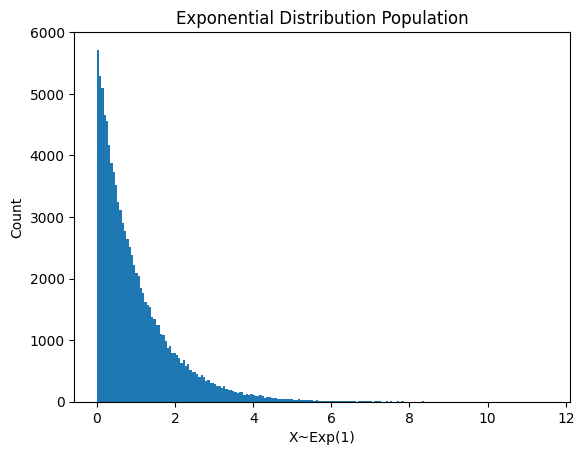

In [51]:
plt.hist(expon_pop, 200)
plt.title("Exponential Distribution Population")
plt.xlabel("X~Exp(1)")
plt.ylabel("Count")
plt.show()

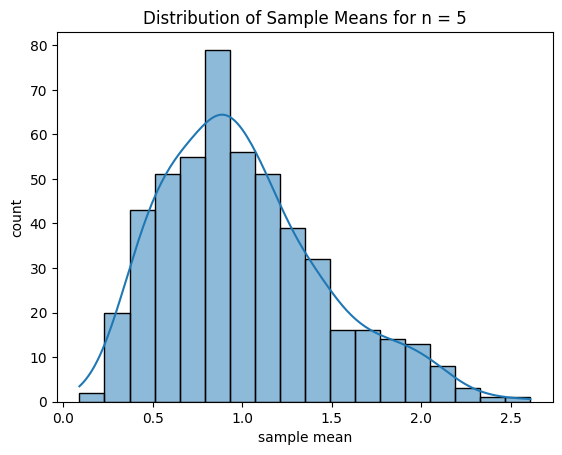

In [52]:
np.random.seed(1)
sample_means = []
n = 5
for i in range(500):
    sample = np.random.choice(expon_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

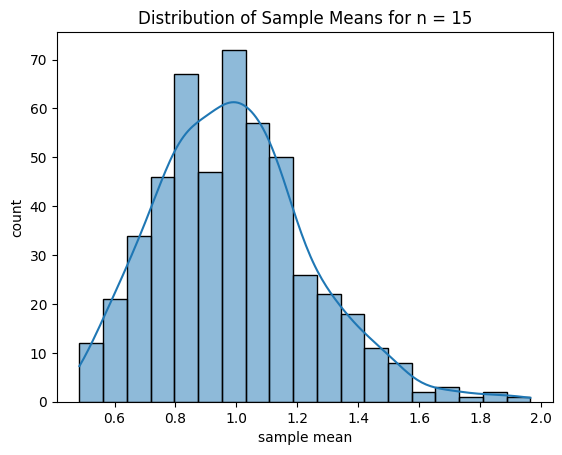

In [53]:
np.random.seed(1)
sample_means = []
n = 15
for i in range(500):
    sample = np.random.choice(expon_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

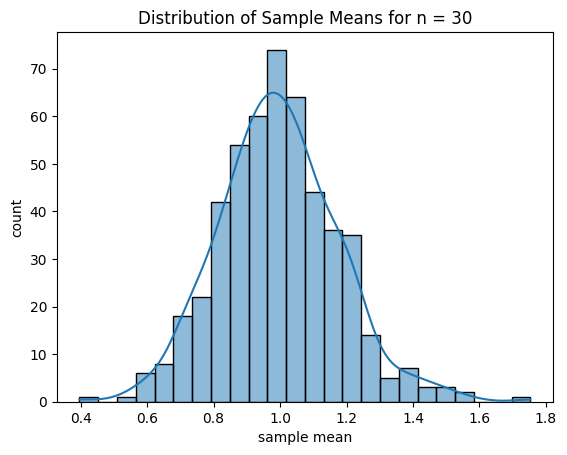

In [54]:
np.random.seed(1)
sample_means = []
n = 30
for i in range(500):
    sample = np.random.choice(expon_pop, size=n)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)
sns.histplot(sample_means, kde=True)
plt.title("Distribution of Sample Means for n = " + str(n))
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

Key Takeaway

We have tried different distributions to simulate the fundamental idea of CLT. We can see that no matter what the shape of the population distribution is, the plot of samples means approximately tends to normal distribution as sample size increases.

------------------------------------------------------------------------------------------------------------------------------------------------------------

## Point Estimation

Let's see how population mean is estimated by the sample mean

A non-profit organization sampled the files of the local forest department to come up with the following amounts (in thousands of dollars) of damages for 10 wildfire incidents:

120, 55, 60, 10, 8, 150, 44, 58, 62, 123

What is the estimate of the average amount of damage in wildfires, in that area?

In [55]:
sample = np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])
x_bar = np.mean(sample)
x_bar

69.0

Insight : The estimate of the average amount of damages in wildfires in that area is $69000.

Usually, point estimate of an unknown population parameter is the corresponding sample statistic.

## Interval Estimation

### Confidence Interval

Let's construct the confidence interval for an example where the population mean is unknown and the standard deviation is known.

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new coffee machine. The mean of the sample is found to be 110 mg. It is known that the standard deviation from all the machines of that manufacturer is 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [56]:
from scipy.stats import norm
x_bar,sigma = 110,7
n = 50
norm.interval(0.95, x_bar, sigma/np.sqrt(n))

(108.05973464591045, 111.94026535408955)

95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.06 mg and 111.94 mg.

The example discussed above is based on the assumption that the population standard deviation is known. However, in the majority of cases, that assumption will not be satisfied.

When we do not know the population standard deviation, it can be estimated from the sample. In this case, the sample mean follows Student's t distribution with (n-1) degrees of freedom.

Just like the normal distribution, t-distribution is also very useful in statistical inference. It is a symmetric distribution around 0. For a very large d.f., the t distribution is almost identical to the standard normal distribution.The parameter of t-distribution is known as degrees of freedom.

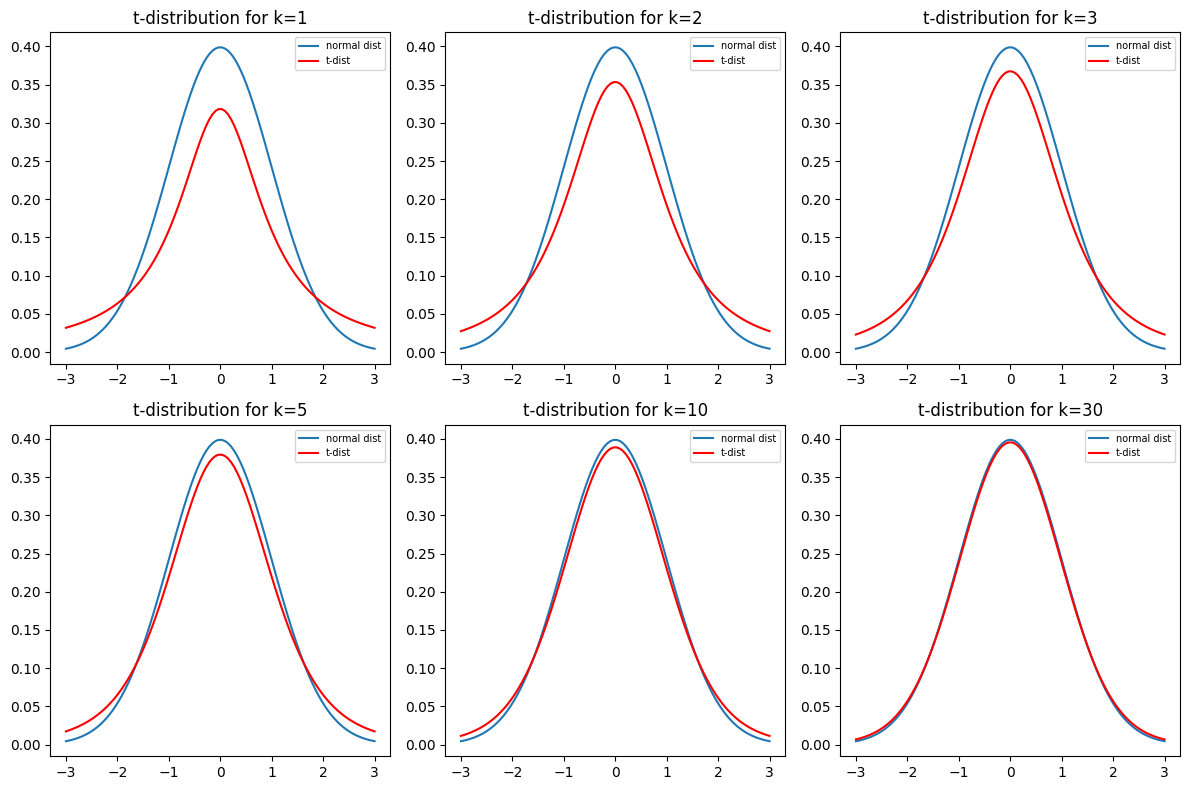

In [57]:
from scipy.stats import norm
from scipy.stats import t

x = np.linspace(-3,3,100)
fig,axes = plt.subplots(2,3,figsize=(12,8))
axes = axes.ravel() 
# .ravel() is used to flatten 2d to 1d. No need to struggle with ax[i][j].
for i,k in zip(range(6), [1,2,3,5,10,30]):
    ax = axes[i]
    ax.plot(x, norm.pdf(x), label='normal dist')
    ax.plot(x, t.pdf(x, df=k), color = 'r', label='t-dist')
    ax.set_title(f"t-distribution for k={k}")
    ax.legend(loc="upper right", fontsize=7)

plt.tight_layout()
plt.show()

Let's use the t-distribution to construct the confidence interval for the mean when population standard deviation is unknown.

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new machine. The mean of the sample is found to be 110 mg and the sample standard deviation is estimated to be 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [58]:
from scipy.stats import t

x_bar, sigma = 110,7
n = 50
k = n-1  # Degrees of Freedom for t
t.interval(0.95, k, x_bar, round(sigma/np.sqrt(n),2))

(108.01052051785568, 111.98947948214432)

Key Takeaways

The confidence interval for the population mean can be constructed for both cases when the population standard deviation is known and when it is unknown. The latter case is more common which demands the application of t-distribution with appropriate degrees of freedom.